### Figure 6 - two pfts

In [1]:
import os
import math
import numpy as np
import matplotlib as mpl
from scipy.io import netcdf as nc
from matplotlib import pyplot as plt
from matplotlib.colors import BoundaryNorm
#from collections import OrderedDict
from matplotlib import cm
import csv
import warnings
warnings.filterwarnings('ignore')

# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Dark2', 8)
colormap = dark(range(8))

# colours for damage classes
viridis = cm.get_cmap('viridis', 10)
dm_colormap = viridis(range(10))

In [2]:
filename_in = 'V3/low_root_N_damage_two_pfts_stoichastic_e1b5bd9_bf013ef_2021-09-10.clm2.h0.fullrun.nc'

fin = nc.netcdf_file(filename_in)
d2_time = fin.variables['time'][:] / 365.
dmdn2time = len(d2_time)
cohort_size_bins = fin.variables['fates_levscls'][:]  # makes indexing easier if we read in full number
nsizebins = len(cohort_size_bins)

BA_SCPF = fin.variables['ED_biomass'][:]
AGB_SCPF = fin.variables['AGB_SCPF'][:]
NPP_SCPF = fin.variables['NPP_SCPF'][:]
GPP_SCPF = fin.variables['GPP'][:]

DDBH_CANOPY_SCPF = fin.variables['DDBH_CANOPY_SCPF'][:]
DDBH_UNDERSTORY_SCPF = fin.variables['DDBH_UNDERSTORY_SCPF'][:]
DDBH_CANOPY_CDPF = fin.variables['DDBH_CANOPY_CDPF'][:]
DDBH_UNDERSTORY_CDPF = fin.variables['DDBH_UNDERSTORY_CDPF'][:]


NPLANT_SCPF = fin.variables['NPLANT_SCPF'][:]
NPLANT_CANOPY_SCPF = fin.variables['NPLANT_CANOPY_SCPF'][:]
NPLANT_UNDERSTORY_SCPF = fin.variables['NPLANT_UNDERSTORY_SCPF'][:]
NPLANT_CANOPY_CDPF = fin.variables['NPLANT_CANOPY_CDPF'][:]
NPLANT_UNDERSTORY_CDPF = fin.variables['NPLANT_UNDERSTORY_CDPF'][:]

MORTALITY_CANOPY_SCPF = fin.variables['MORTALITY_CANOPY_SCPF'][:]
MORTALITY_UNDERSTORY_SCPF = fin.variables['MORTALITY_UNDERSTORY_SCPF'][:]
MORTALITY_CANOPY_CDPF = fin.variables['MORTALITY_CANOPY_CDPF'][:]
MORTALITY_UNDERSTORY_CDPF = fin.variables['MORTALITY_UNDERSTORY_CDPF'][:]

fin.close()

[90.58607]


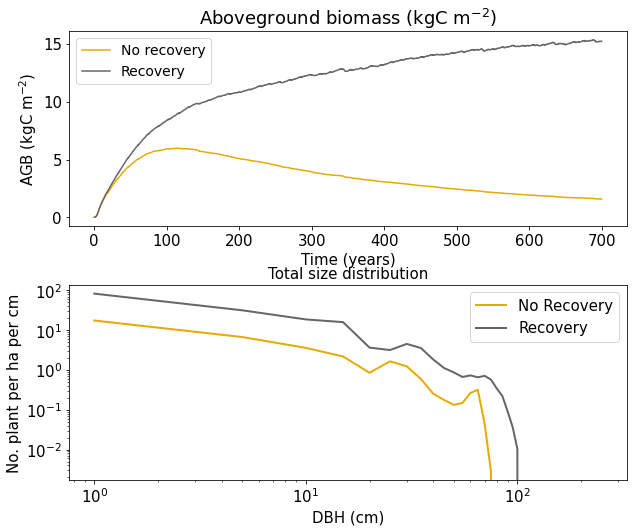

In [3]:
fig1, ((f1ax0, f1ax1)) = plt.subplots(nrows=2,ncols=1, figsize=(10,8))

### AGB
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,0:30,:], axis=1), label = 'No recovery', 
          color=colormap[5])
f1ax0.plot(d2_time, np.sum(AGB_SCPF[:,30:,:], axis = 1), label = 'Recovery', color=colormap[7])
f1ax0.set_title(r'Aboveground biomass (kgC m$^{-2}$)', fontsize = 18)
f1ax0.set_ylabel('AGB (kgC m$^{-2}$)', fontsize = 15)
f1ax0.set_xlabel('Time (years)', fontsize=15)
f1ax0.tick_params(labelsize=15)
f1ax0.legend(prop={'size':14})

cohort_size_bins_ex = np.append(cohort_size_bins,300)
bins = np.diff(cohort_size_bins_ex)

a = np.squeeze(NPLANT_SCPF[:,1:30,:])
a = np.mean(a[3600:,:],axis=0)  
a = a/bins[1:]

b = np.squeeze(NPLANT_SCPF[:,31:,:])
b = np.mean(b[3600:,:],axis=0)  
b = b/bins[1:]

agb_r = np.sum(AGB_SCPF[:,30:,:], axis = 1)
agb_t = np.sum(AGB_SCPF, axis=1)

print(agb_r[8399,:]/agb_t[8399,:]*100)


f1ax1.plot(cohort_size_bins_ex[1:-1], a, label = 'No Recovery', linewidth = 2, 
            color = colormap[5])
f1ax1.plot(cohort_size_bins_ex[1:-1], b, label = 'Recovery', linewidth = 2, 
           color=colormap[7])
f1ax1.set_title(r'Total size distribution', fontsize = 15)
f1ax1.set_xlabel('DBH (cm)', fontsize = 15)
f1ax1.set_ylabel('No. plant per ha per cm', fontsize = 15)
f1ax1.tick_params(labelsize=15)
f1ax1.set_yscale('log')
f1ax1.set_xscale('log')
f1ax1.legend(prop={'size': 15})

plt.subplots_adjust(left=0.125, bottom=0.12, right=0.9, top=0.9, wspace = 0.3, 
                    hspace = 0.3)

plt.savefig("Figures_v3/AGB_size_2pfts_stochastic_old.png", format = 'png', dpi = 300)
    